# BINANCE STOCK PRICE PREDICTION

## Project Summary

## Business Understanding 

Binance is a leading cryptocurrency exchange and a major player in the digital asset space. Its stock prices or token values are influenced by a variety of factors such as market demand, news, regulations, and macroeconomic conditions. Accurate predictions can help users maximize returns and manage risks.

- Key Stakeholders:

Retail Traders and Investors: Seeking to optimize their trading strategies.
Institutional Investors: Using predictions to manage portfolios and hedge risks.
Binance Ecosystem Participants: Interested in understanding market trends.
Business Goals:

Enable informed trading by predicting short-term price movements.
Enhance investment decision-making through trend analysis.
Mitigate risks by identifying potential downturns in advance.
Technical Goals:

Develop a robust machine learning model that accurately predicts price movements.
Integrate relevant external data such as market sentiment, trading volumes, and news sentiment.
Value Proposition:
Providing an accurate and actionable predictive system improves confidence in decision-making, supports profitability for users, and strengthens Binance's position as a transparent and data-driven ecosystem.

- Metrics of Success:

Prediction Accuracy: High precision in predicting stock or token price changes.
Model Interpretability: Ease of understanding key drivers of predictions.
ROI Improvement: Demonstrated better returns or reduced risks for users.

### Objective


- To predict the future price movements of Binance's stock or cryptocurrency assets to empower investors and traders with data-driven insights for making informed decisions.


## Data preparation

In [1]:
# Loading the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# loading the dataset
df = pd.read_csv("bnb.csv")

In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  2650 non-null   object 
 1   date    2650 non-null   object 
 2   open    2650 non-null   float64
 3   high    2650 non-null   float64
 4   low     2650 non-null   float64
 5   close   2650 non-null   float64
dtypes: float64(4), object(2)
memory usage: 124.3+ KB


In [4]:
# Dataset Description
df.describe()

,open,high,low,close
count,2650.000000,2650.000000,2650.000000,2650.000000
mean,209.806639,215.701241,203.581398,210.064996
std,208.019553,213.546993,201.990237,208.179737
min,0.698600,0.716600,0.648100,0.688200
25%,15.952500,16.492500,15.422500,15.990000
50%,216.136000,221.043000,213.329500,216.486000
75%,334.625000,345.031750,323.743250,335.047500
max,749.604000,793.907000,728.934000,749.514000


## Data Preprocessing

In [5]:
# Drop Unncessary columns
df = df.drop("ticker", axis=1)

In [6]:
# Set the date as the index for visualization and machine learning
df = df.set_index('date')

In [7]:
# Check for duplicates
df.duplicated().sum()

1

In [8]:
# Check for NaN Values
df.isna().sum()

open     0
high     0
low      0
close    0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='date'>

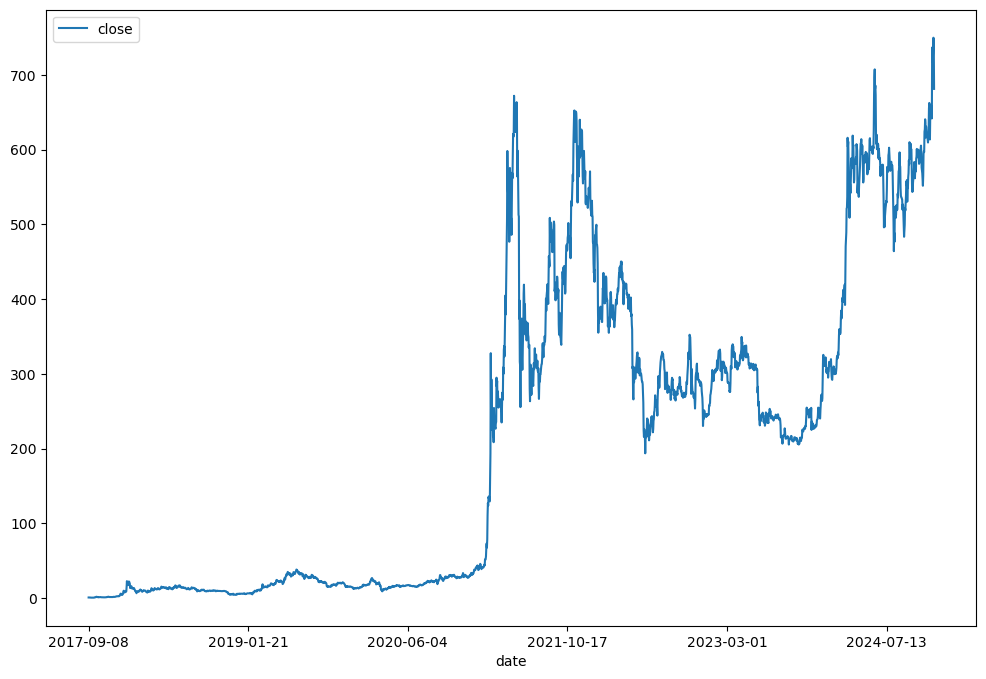

In [9]:
df.plot.line(y= "close", use_index=True, figsize = (12,8))

The closing price increased drastically in the year 2020, fell in the following year and gained its highest peak in the year 2024

## Feature Engineering

In [10]:
# Create a new column to show the closing price of the next day
df["tomorrow"] = df["close"].shift(-1)

In [11]:
# Create a new column to show whether the closing price increased or not 
df["target"] = (df["tomorrow"] > df["close"]).astype(int)

## Modelling

In [17]:
# Loading the modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
y = df.drop(["tomorrow", "target"], axis=1)
x = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Baseline Model 1:  Decision Tree

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 2017-09-08 to 2024-12-09
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2650 non-null   float64
 1   high      2650 non-null   float64
 2   low       2650 non-null   float64
 3   close     2650 non-null   float64
 4   tomorrow  2649 non-null   float64
 5   target    2650 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 199.1+ KB


In [18]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# Evaluation metrics
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {acc_dt},Confusion Matrix: {cm_dt}")

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.